# HW3 - Exploratory Data Analysis, Visualization, Hypothesis Testing

In this homework, we are going to pick up exactly where we left off last time. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In this assignment, we will be using the same diabetes dataset as before. Just like last time, create a data folder and place the data inside. Add a `.gitignore` file just like last time to prevent yourself from committing the file:

In [2]:
diabetes_df = pd.read_csv('../data/diabetic_data.csv',na_values=['None'])

# Finding outliers

During exploratory data analysis, it is generally important to find out if there are any outliers in the data. Outliers can greatly affect certain estimates such as means and standard deviations. In addition, certain types of statistical models do not work well in the presence of outliers.

The statistical way of defining an outlier is generally to see whether it falls outside of the following range:

$$(Q_1 - 1.5 * IQR, Q_3 + 1.5 * IQR)$$,

where $Q_1$ is the 25th percentile, $Q_3$ is the 75th percentile, and the $IQR$ is the difference between them. 

The columns that you will be working with for the following exercise are as follows:

 * `num_lab_procedures`
 * `num_procedures`
 * `num_medications`
 * `number_outpatient`
 * `number_emergency`
 * `number_inpatient`
 * `number_diagnoses`

## For each of the above columns, plot a histogram of the values

In [3]:
numeric_cols = ['num_lab_procedures',
                'num_procedures',
                'num_medications',
                'number_outpatient',
                'number_emergency',
                'number_inpatient',
                'number_diagnoses']


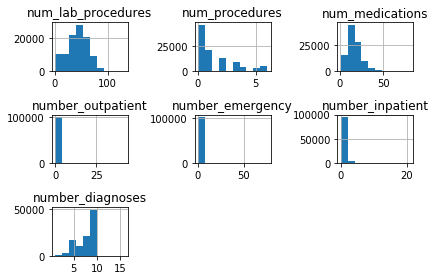

In [18]:
for n, col in enumerate(numeric_cols):
    ax = plt.subplot(3,3,n+1)
    diabetes_df[col].hist() #etc. 
    plt.title(col)
    
plt.tight_layout()


## Find encounter ids which are outliers in each of the columns listed above

> In order to do this, first compute the bounds for outliers as noted above for each of the columns necessary. Then, find the `encounter_id`s which have outlier values. 


In [5]:
def find_bounds(array):
    """
    Args:
        array np.ndarray:
    Returns:
        bounds List[Numeric, Numeric]: 
    """
    q1 = np.percentile(array, 25)
    q3 = np.percentile(array, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return [lower_bound, upper_bound]

In [6]:
def is_outlier(bound_array, value):
    if value < bound_array[0] or value > bound_array[1]:
        return True
    else:
        return False

In [21]:
bounds = diabetes_df[numeric_cols].apply(find_bounds)
bounds


num_lab_procedures    [-8.0, 96.0]
num_procedures         [-3.0, 5.0]
num_medications       [-5.0, 35.0]
number_outpatient       [0.0, 0.0]
number_emergency        [0.0, 0.0]
number_inpatient       [-1.5, 2.5]
number_diagnoses       [1.5, 13.5]
dtype: object

In [22]:
# Find encounter ids & num procedures which are below lower bound or above upper bound

outliers = {}
for col in numeric_cols:
    outliers[col] = diabetes_df.loc[
        (diabetes_df[col] < bounds[col][0])|(diabetes_df[col] > bounds[col][1]),
        'encounter_id'
    ].values
    print(col,'has',len(outliers[col]),'outliers')
    

num_lab_procedures has 143 outliers
num_procedures has 4954 outliers
num_medications has 2557 outliers
number_outpatient has 16739 outliers
number_emergency has 11383 outliers
number_inpatient has 7049 outliers
number_diagnoses has 281 outliers


## Using the seaborn.catplot function, create a plot according to the following specifications:

 * Each of the columns listed above should be a subplot
 * For each, you should plot a boxplot
 * Each row of subplots should have 2 plots (except for the last one, since there are an odd number of plots)
 * Each row should not share a y-axis
 
You can find the documentation for the catplot function [here](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

#### Create a subset of the diabetes dataframe that just contains those columns

#### Currently, the dataframe is in wide-form. Instead, change the dataframe so that the category name is in one column, and all the values are stacked in another (melted)

In [23]:
melted = diabetes_df[numeric_cols].melt()

In [24]:
melted.head()

,variable,value
0,num_lab_procedures,41
1,num_lab_procedures,59
2,num_lab_procedures,11
3,num_lab_procedures,44
4,num_lab_procedures,51


#### Use the catplot function to plot the graph. Make sure to adhere to each of the conditions listed above

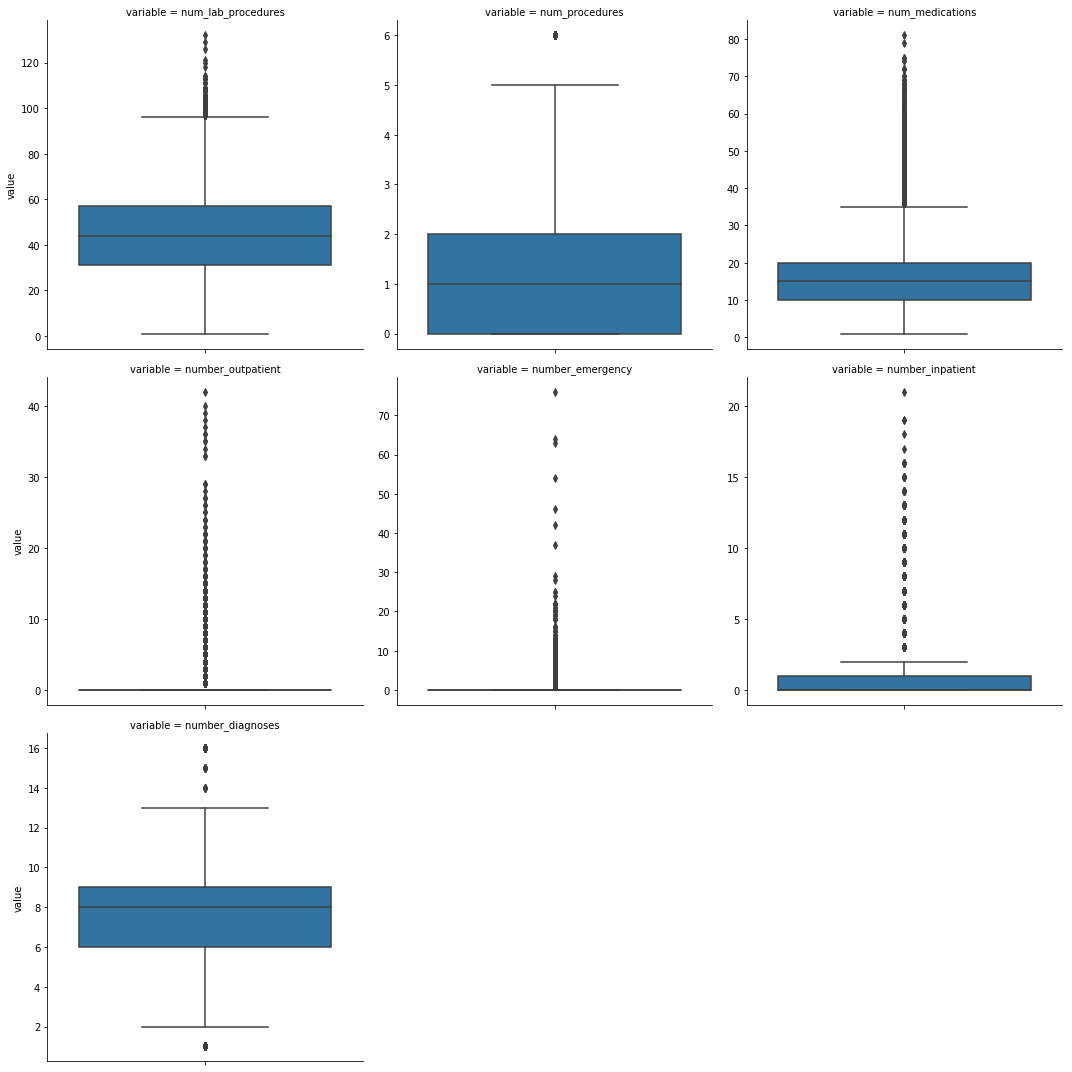

In [25]:
ax = sns.catplot(y = 'value',
                 col = 'variable',
                 data = melted,
                 kind = 'box',
                 col_wrap = 3, sharey=False)


## Making cosmetic changes and Checking the boxplot outlier implementation:

The *whiskers* of a boxplot often extend to the bounds for outliers. However, some boxplot implementations choose other bounds for the whiskers, such as the maximum and minimum values, or a set percentile (10th, 90th, etc). In this next step, you will utilize `matplotlib`'s `Axes` objects to change the subplots in some way.

Recall that Seaborn (and many other plotting libraries) are built off of `matplotlib` objects. Therefore, you can always modify these plots with all of the custom functions that are available in `matplotlib`'s interface. To access the `Axes` objects of your plot, save your plot to a variable, and call 

`variable.axes`

You should see an array of `Axes` objects appear. These will be objects that you set attributes of in order to modify your plots.


### Clean up the titles for each graph so that they are either the name of the columns or a cleaner representation

For example, rather than `variable = number_emergency`, you can set it to `number_emergency`, or `Number of Emergency Visits`.

you can do this my accessing the `Axes`, and using `set(title =)`. 

### Add dotted lines at each of the upper and lower outlier bounds. Pick a non-default color and linestyle of your choice for these.

To check if seaborn boxplots use the same outlier method for determining the bound of the whiskers, add a dotted line at the upper and lower bound of each of these columns with a non-default color and linestyle and see if they line up with the seaborn boxplot whiskers

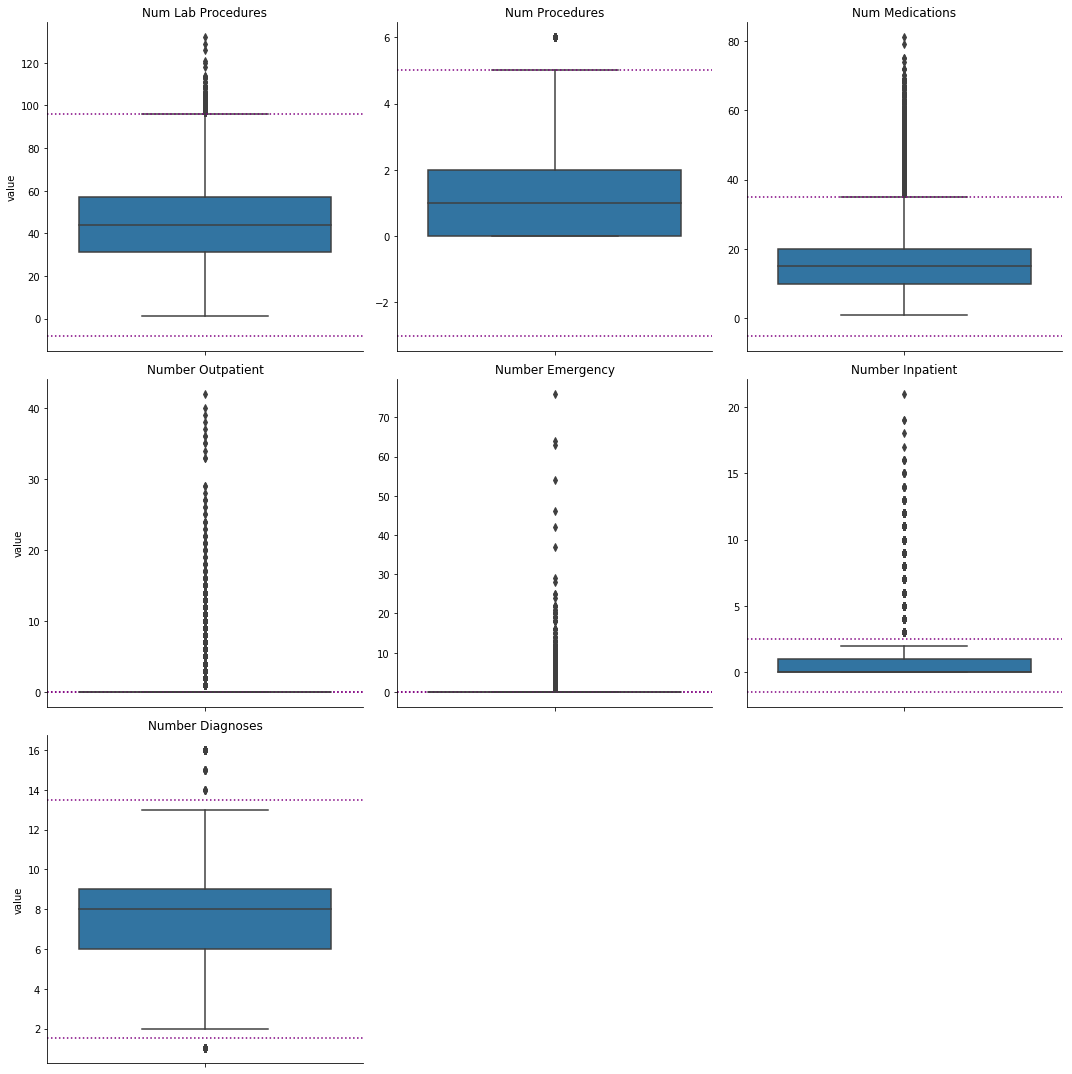

In [26]:
ax = sns.catplot(y = 'value',
                 col = 'variable',
                 data = melted,
                 kind = 'box',
                 col_wrap = 3, sharey=False)

for i in range(len(ax.axes)):
    col = numeric_cols[i]
    
    # Create a neat title
    ax.axes[i].set_title(col.strip('variable = ').replace('_',' ').title())

    # Draw the dotted lines
    ax.axes[i].axhline(bounds[col][0], linestyle = ":", color = "purple") # Can iterate through
    ax.axes[i].axhline(bounds[col][1], linestyle = ":", color = "purple") # Can iterate through
    

# Hypothesis testing

In the paper that produced the dataset, the authors perform a series of hypothesis tests. However, as is common in the literature, they often do not provide confidence intervals or explain which hypothesis tests were performed. Here, we want to reproduce the results of the paper, but to generate confidence intervals so we have a better sense of the uncertainty behind their results.

### Test 1: 

> When an HbA1c was not obtained, 42.5% of patients had a medication change during the hospitalization, whereas those providers who ordered the test appear to have been somewhat more responsive as determined by changes in medication (55.0%, P < 0.001).

Here, we can represent this statement as the following hyptothesis test:

$$ H_0: p_1 = p_2 $$
$$ H_1: p_1 \neq p_2 $$

Equivalently:

$$ H_0: p_1 - p_2 = 0$$
$$ H_1: p_1 - p_2 \neq 0$$


where p is the probability that a provider changed the medication (given by the `change` column)

In order to test the equality of two proportions, the Z-test for 2 proportions is often used. In this setting, the Test statistic is distributed according to the standard normal distribution: N(0, 1)

$$ Z_t = \frac{\hat{p_1} - \hat{p_2}}{\hat{\sigma_D}} $$

Here, $\hat{p_1}$ and $\hat{p_2}$ are the observed proportions of a provider changing a medication.

Here, we will assume that the two populations have the same variance, meaning we can use what is known as a *pooled standard error*. The details of this are outside the scope of this course. 

$$\hat{p} = \frac{n_1\hat{p_1} + n_2\hat{p_2}}{n_1 + n_2} $$

$$\hat{\sigma_D} = \sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}$$

where $n_1$ and $n_2$ are the sample sizes for groups 1 and 2, respectively

In this case, the assumptions for the test are as follows:

 * The two populations are independent
 * They are sampled at random
 * There is enough data such that
     * $np > 10$
     * $n(1-p) > 10$
     
which we can assume holds in this case.

Compute $\hat{p_1}$ and $\hat{p_2}$ by checking the proportion of the time that the `change` column is equal to `Ch` when the A1C column is *not* None ($\hat{p_1}$) versus when it is None ($\hat{p_2}$). You can use `pd.isnull()` to check where a column is missing. Note that the numbers may be slightly off of the numbers from the paper due to the way that they remove certain encounters

In [5]:
# Value counts for p1
display(diabetes_df.loc[~pd.isnull(diabetes_df['A1Cresult']), 'change'].value_counts())

# Value counts for p2
display(diabetes_df.loc[pd.isnull(diabetes_df['A1Cresult']), 'change'].value_counts())

Ch    9490
No    7528
Name: change, dtype: int64

No    47227
Ch    37521
Name: change, dtype: int64

In [27]:
n_1 = diabetes_df.loc[~pd.isnull(diabetes_df['A1Cresult']), 'change'].value_counts().sum()
n_2 = diabetes_df.loc[pd.isnull(diabetes_df['A1Cresult']), 'change'].value_counts().sum()

phat_1 = diabetes_df.loc[~pd.isnull(diabetes_df['A1Cresult']),'change'].value_counts()['Ch']/n_1
phat_2 = diabetes_df.loc[pd.isnull(diabetes_df['A1Cresult']),'change'].value_counts()['Ch']/n_2

print('n_1 =',n_1)
print('n_2 =',n_2)
print('phat_1 =',phat_1)
print('phat_2 =',phat_2)

n_1 = 17018
n_2 = 84748
phat_1 = 0.5576448466329769
phat_2 = 0.44273611176664934


#### Next, compute the value of the test statistic:



In [32]:
import math
from scipy import stats

phat = (n_1*phat_1 + n_2*phat_2)/(n_1 + n_2)
sigma_d = math.sqrt((phat * (1-phat)) * (1./n_1 + 1./n_2))

# Test statistic
z_score = (phat_1-phat_2)/sigma_d
# p_value = stats.norm.cdf(-z_score)*2

# ci = (mu - z_star*sigma_d, mu + z_star*sigma_d)

print('phat =',phat)
print('sigma_d =',sigma_d)
print('test statistic =',z_score)
# print('p_value =',p_value)
# print('ci =',ci)
# print('phat =',)

phat = 0.46195192893500775
sigma_d = 0.0041878517136400084
test statistic = 27.438587305291865


Because the Z-statistic is distributed according to the standard Normal Distribution, we can find the p-value by using the `norm.cdf()` command.

Because our alternative hypothesis is 2-sided, we can compute the p-value as follows:

`norm.cdf(z) * 2`

This is because we allow for our test statistic to be either greater than OR less than the critical values.

#### Compute the p-value

In [31]:
p_value = stats.norm.cdf(-z_score)*2
print("p value = ",p_value)

p value =  9.506951357707911e-166


#### Verify using the following method that your test statistic and p-value match

In [36]:
import statsmodels.api as sm

# If you did this with p1 = not None and p2 = None, as given, use this:
z_score, p_value = sm.stats.proportions_ztest([9490,37521], [n_1, n_2])

# If you did this with p1 and p2 the other way around, use this:
# z_score, p_value = sm.stats.proportions_ztest([37521, 9490], [n_1, n_2])

In [37]:
z_score, p_value

(27.438587305291865, 9.506951357707911e-166)

#### An aside:

To find the value of the test statistic that would give us exactly 0.05 significance, we can use:

`normQuantile(0.025)`
and
`normQuantile(0.975)`

(where the `normQuantile` function (which in scipy is `norm.ppf`) tells us what at what value the Cumulative Distribution Function is equal to the argument. The quantile function is the inverse of the Cumulative Distribution Function)


As this gives us half of the 0.05 significance level on either side. 

For one sided tests, this would just be 

`normQuantile(0.05)` 
or
`normQuantile(0.95)`
depending on the direction of the alternative hypothesis

Next, we're going to construct a confidence interval. The p-value just tells us that it is unlikely, given that the null hypothesis is true, that we would see data as extreme or more extreme than what we saw. In other words, if there were no difference in the way that physicians changed diabetes patients' medications depending on whether they tested for A1C or not, then it would be highly unlikely that we would see a pattern as extreme as we see in the data. 

However, this does not tell us *anything* about how different the values actually are. To generate a 95% confidence interval, we take the *observed* difference in proportions and construct it in the following way:

$\hat{p_1} - \hat{p_2} \pm Z_* \sigma_D$

Where $Z_*$ here is `normQuantile(0.975)` or `normQuantile(0.025)` (the only difference is the sign change)

### Find the confidence interval for this test

This tells us that in a specific example of this procedure being run, there is a 95% probability that the true difference between the means falls between the two bounds. Remember that this says nothing about whether the true difference is in these bounds or not!

In [44]:
# Confidence interval.

# If you did this with p1 = not None and p2 = None, as given, use this:
ci1 = phat_1-phat_2 - stats.norm.ppf(0.975)*sigma_d, phat_1-phat_2 + stats.norm.ppf(0.975)*sigma_d

# If you did this with p1 and p2 the other way around, use this:
ci2 = (phat_2-phat_1) - stats.norm.ppf(0.975)*sigma_d, phat_2-phat_1 + stats.norm.ppf(0.975)*sigma_d

print(ci1)
print(ci2)

(0.10670069633499876, 0.12311677339765628)
(-0.12311677339765628, -0.10670069633499876)
